# Levelable - Data Analysis

A file to do some basic data wrangling on the data generated by `levelable_main.ipynb`.

In [1]:
# Load some relevant packages
import pandas as pd
import numpy as np

from sage.graphs.independent_sets import IndependentSets
from sage.graphs.graph_input import from_graph6
from sage.graphs.trees import TreeIterator

###### Some functions for convenience:

In [19]:
# is_levelable()
# Check whether a graph is levelable. Takes either a graph6 string or graph object.
# If verbose = True, print the associated data with that graph

def is_levelable(g6s, verbose = False):
    
    if isinstance(g6s, basestring):
        # Read the string and produce the graph
        g = Graph()
        from_graph6(g, g6s)
    else:
        g = g6s
           
    indSets = IndependentSets(g, maximal = True)
    t = len(list(indSets))
    
    # Grab the number of vertices
    n = len(g.vertices())

    # Prepare matrices
    A = np.zeros((t-1, n))
    B = np.zeros((t-1, 1))

    # Iterate through all the facets of the independence complex
    for j in range(0,t-1):

        # Grab facet j
        Fj = list(indSets)[j]

        # Grab facet j + 1
        Fj1 = list(indSets)[j+1]


        # Iterate through every vertex of the facet j
        for k in range(0, len(Fj)):

            # Add 1 to these spots in the matrix
            A[j, Fj[k]] = A[j, Fj[k]] + 1

        # Iterate through every vertex of the facet j + 1
        for k in range(0, len(Fj1)):

            # Subtract 1 to these spots in the matrix
            A[j, Fj1[k]] = A[j, Fj1[k]] - 1

        # Other side of the equation - set the j-th entry 
        B[j, 0] = len(Fj) - len(Fj1)
    
    p = MixedIntegerLinearProgram(maximization = False, solver = "GLPK")
    x = p.new_variable()
    
    for l in range(n):
        p.set_min(x[l], 2)
    
    for l in range(t-1):
        # Add a constraint according to the i^th equation
        p.add_constraint(sum(A[l,j]*x[j] for j in range(n)) == B[l])
    
    try:
        # Print data if verbose
        if (verbose):

            g.show()
            print g.graph6_string()
            print "Independent Sets"
            print list(indSets)
            
            print
            print "Matrix A"
            print A
    
            print
            print "B"
            print B

        # Try solving (tries to minimize by default)
        p.solve()
        
    except:

        if (verbose):
            print 
            print "No solution found"
        return False
    else:  
        
        # Get solution
        s = p.get_values([x[r] for r in range(n)])
        
        # Double check that the solution works 
        if np.array_equal(np.matrix(np.dot(A,s)), transpose(B)):
            
            if (verbose):
                print
                print "Solution"
                print s
                
            return True
        
        else:
            
            # If the solution doesn't work, try to get a solution from maximzation instead
            try:
                p.solve(maximization = True)
                
            except:
                if (verbose):
                    print
                    print "No solution found (maximzation step necessary)"
                return False
            
            else:
                print
                print "Solution"
                print s
                return True

In [75]:
# g6_show()
# Show a graph from a graph6 string

def g6_show(string):
    g = Graph()
    from_graph6(g, string)
    g.show()

## Checking failures in datagen

There are some problems in `results9_3of9.csv` and `results9_5of9.csv` where the levelable column reads "Error" instead of T or F.

HCQ`ea}


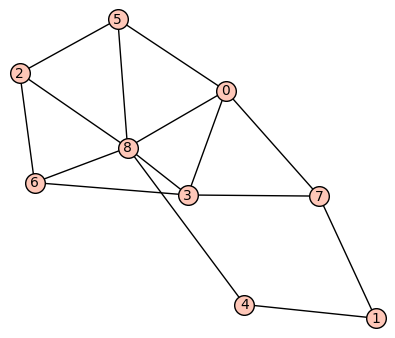

Independent Sets
[[0, 1, 2], [0, 1, 6], [0, 2, 4], [0, 4, 6], [1, 2, 3], [1, 3, 5], [1, 5, 6], [1, 8], [2, 3, 4], [2, 4, 7], [3, 4, 5], [4, 5, 6, 7], [7, 8]]

Matrix A
[[ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  1. -1.  0. -1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 1. -1. -1. -1.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0. -1.]
 [ 0.  1. -1. -1. -1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  1. -1.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  1.  1.  1.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 2.]]

No solution found
False
HCQ`eav


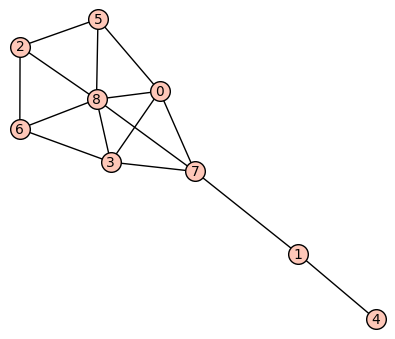

Independent Sets
[[0, 1, 2], [0, 1, 6], [0, 2, 4], [0, 4, 6], [1, 2, 3], [1, 3, 5], [1, 5, 6], [1, 8], [2, 3, 4], [2, 4, 7], [3, 4, 5], [4, 5, 6, 7], [4, 8]]

Matrix A
[[ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  1. -1.  0. -1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 1. -1. -1. -1.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0. -1.]
 [ 0.  1. -1. -1. -1.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  1. -1.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0. -1. -1.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 0.]
 [-1.]
 [ 2.]]

No solution found
False
HCQb`qu


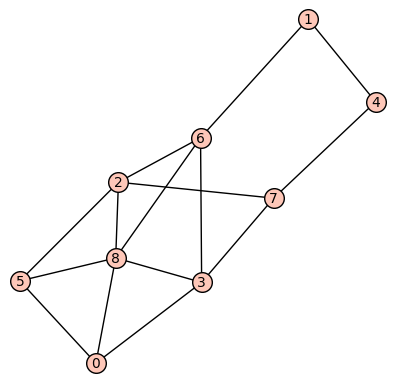

Independent Sets
[[0, 1, 2], [0, 1, 7], [0, 2, 4], [0, 4, 6], [0, 6, 7], [1, 2, 3], [1, 3, 5], [1, 5, 7], [1, 7, 8], [2, 3, 4], [3, 4, 5], [4, 5, 6], [4, 8], [5, 6, 7]]

Matrix A
[[ 0.  0.  1.  0.  0.  0.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. -1.  0.]
 [ 1. -1. -1. -1.  0.  0.  1.  1.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -1.]
 [ 0.  1. -1. -1. -1.  0.  0.  1.  1.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  1.  0. -1.]
 [ 0.  0.  0.  0.  1. -1. -1. -1.  1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]]

No solution found
False
HCQbdr[


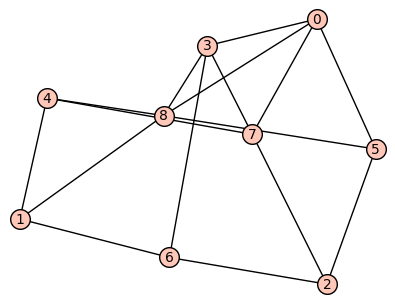

Independent Sets
[[0, 1, 2], [0, 2, 4], [0, 4, 6], [1, 2, 3], [1, 3, 5], [1, 5, 7], [2, 3, 4], [2, 8], [3, 4, 5], [4, 5, 6], [5, 6, 7], [6, 7, 8]]

Matrix A
[[ 0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 1. -1. -1. -1.  1.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1. -1. -1. -1.  1.  0.  1.  0.]
 [ 0.  0.  0.  1.  1.  0.  0.  0. -1.]
 [ 0.  0.  1. -1. -1. -1.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 0.]]

No solution found
False
HCQbdW|


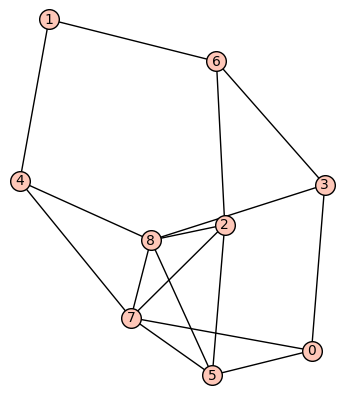

Independent Sets
[[0, 1, 2], [0, 1, 8], [0, 2, 4], [0, 4, 6], [0, 6, 8], [1, 2, 3], [1, 3, 5], [1, 3, 7], [2, 3, 4], [3, 4, 5], [4, 5, 6], [6, 7]]

Matrix A
[[ 0.  0.  1.  0.  0.  0.  0.  0. -1.]
 [ 0.  1. -1.  0. -1.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -1.]
 [ 1. -1. -1. -1.  0.  0.  1.  0.  1.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.  0.]
 [ 0.  1. -1.  0. -1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  1.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]

No solution found
False
HCQeJav


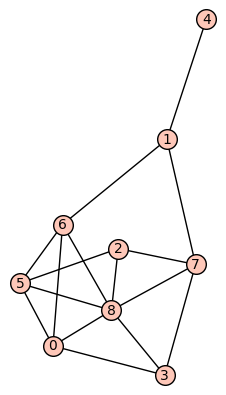

Independent Sets
[[0, 1, 2], [0, 2, 4], [0, 4, 7], [1, 2, 3], [1, 3, 5], [1, 8], [2, 3, 4, 6], [3, 4, 5], [4, 5, 7], [4, 6, 7], [4, 8]]

Matrix A
[[ 0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0. -1.  0.]
 [ 1. -1. -1. -1.  1.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  0.  0. -1.]
 [ 0.  1. -1. -1. -1.  0. -1.  0.  1.]
 [ 0.  0.  1.  0.  0. -1.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  1. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  1. -1.]]

B
[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [-2.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 1.]]

No solution found
False
HEhfcxj


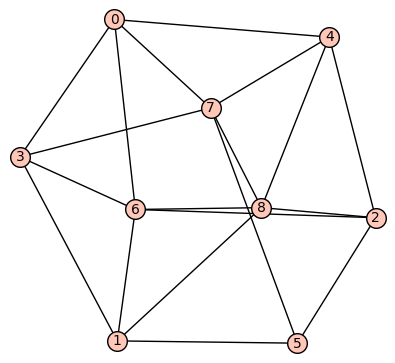

Independent Sets
[[0, 1, 2], [0, 5, 8], [1, 2, 7], [1, 4], [2, 3], [3, 4, 5], [3, 5, 8], [4, 5, 6], [6, 7]]

Matrix A
[[ 0.  1.  1.  0.  0. -1.  0.  0. -1.]
 [ 1. -1. -1.  0.  0.  1.  0. -1.  1.]
 [ 0.  0.  1.  0. -1.  0.  0.  1.  0.]
 [ 0.  1. -1. -1.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -1.]
 [ 0.  0.  0.  1. -1.  0. -1.  0.  1.]
 [ 0.  0.  0.  0.  1.  1.  0. -1.  0.]]

B
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [-1.]
 [ 0.]
 [ 0.]
 [ 1.]]

No solution found
False


In [36]:
# Import first problematic file
df = pd.read_csv("results/results9_3of9.csv")

# Record lines with errors
errorEntries = df[df.levelable == "Error"]

# Remove these lines from the original
df = df[df.levelable != "Error"]

# Check whether the lines with errors are levelable or not
## They are probably not
for index, row in errorEntries.iterrows():

    # Check levelability using maximization
    print row['graph6 string']
    print is_levelable(row['graph6 string'], verbose = True)    
    errorEntries.loc[[index], ["levelable"]] = is_levelable(row['graph6 string'])
    
    

In [39]:
df

,graph6 string,levelable,minimized solution
0,H?BE@_o,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]"
1,H?BE@b_,F,NaN
2,H?BE@ao,F,NaN
3,H?BE@bG,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]"
4,H?BE@_w,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]"
5,H?BE@bC,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0]"
6,H?BE@b@,F,NaN
7,H?BE@a`,F,NaN
8,H?BE@_p,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0]"
9,H?BE@aH,F,NaN


In [34]:
errorEntries

,graph6 string,levelable,minimized solution
26345,HCQ`ea},False,NaN
26354,HCQ`eav,False,NaN
31531,HCQb`qu,False,NaN
31800,HCQbdr[,False,NaN
32140,HCQbdW|,False,NaN
37208,HCQeJav,False,NaN
47515,HEhfcxj,False,NaN


## Enumerating levelable graphs

In [13]:
# Results over how many vertices?
minVertices = 5
maxVertices = 10

vertices = range(minVertices, maxVertices)

resultsHead = list([["Vertices", "Levelable", "Total graphs"]])
results = list()

for n in vertices:
    # Read the .csv
    df = pd.read_csv("results/results" + str(n) + ".csv")
    
    # Count the number of total graphs in the .csv
    countAll = df.shape[0]
    
    # Count the number of levelable in the .csv
    countLev = df[df.levelable == "T"].shape[0]
    
    results.append([n, countLev, countAll])

print pd.DataFrame(data = np.array(results), columns =resultsHead)

   Vertices  Levelable  Total graphs
0         5         33            34
1         6        140           156
2         7        793          1044
3         8       6962         12346
4         9      98281        274668


## Smallest non-levelable graph
By inspection, there is only one graph on 5 vertices that is not levelable. 

In [3]:
df5 = pd.read_csv("results/results5.csv")

print df5[df5.levelable == "F"]

# Get the index where the False occurs
ind = df5.index[df5.levelable == "F"][0]

# Get the graph6 string of that entry
g6s = df5.loc[ind]["graph6 string"]


   graph6 string levelable minimized solution
19           DQo         F                NaN


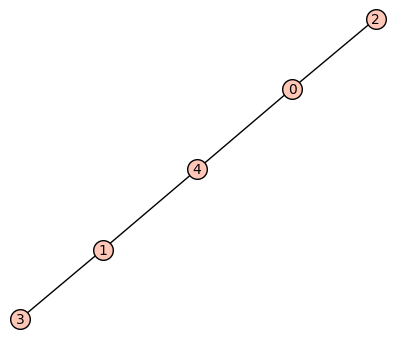

'DQo'

In [5]:
# Load the graph
g = Graph()
from_graph6(g, g6s)

# Show the graph
g.show()
g.graph6_string()

## Are all paths with greater than 4 vertices not levelable?

In [13]:
print ("Is it levelable?")

for n in range(5,21):

    if is_levelable(graphs.PathGraph(n)):
        answer = "Yes"
    else:
        answer = "No"
        
    print "path on " + str(n) + " vertices: " + answer
    

Is it levelable?
path on 5 vertices: No
path on 6 vertices: No
path on 7 vertices: No
path on 8 vertices: No
path on 9 vertices: No
path on 10 vertices: No
path on 11 vertices: No
path on 12 vertices: No
path on 13 vertices: No
path on 14 vertices: No
path on 15 vertices: No
path on 16 vertices: No
path on 17 vertices: No
path on 18 vertices: No
path on 19 vertices: No
path on 20 vertices: No


## Do non-levelable graphs always have a path of length >4  embedded?

### Look at non-levelable graphs

We should expect that these DO have such paths.

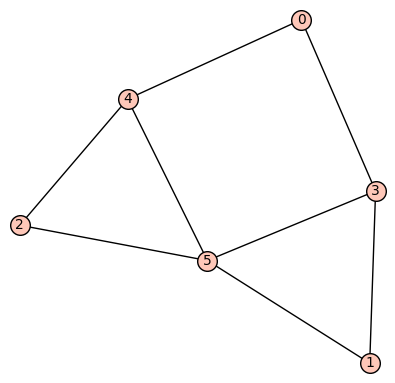

EEhw  6


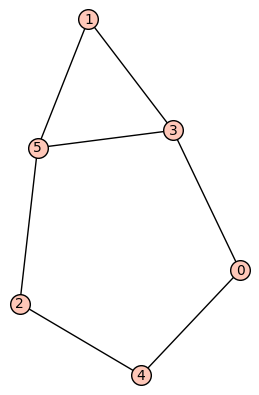

EEho  6


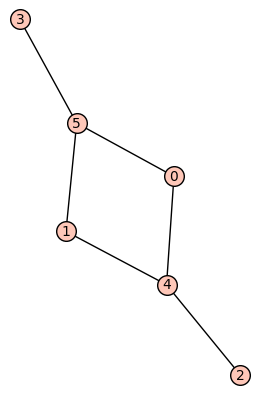

E?zO  5


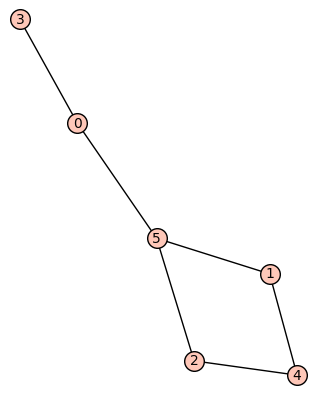

ECZ_  6


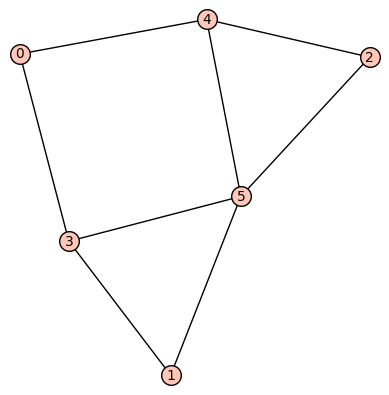

EEhw  6


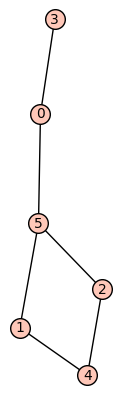

ECZ_  6


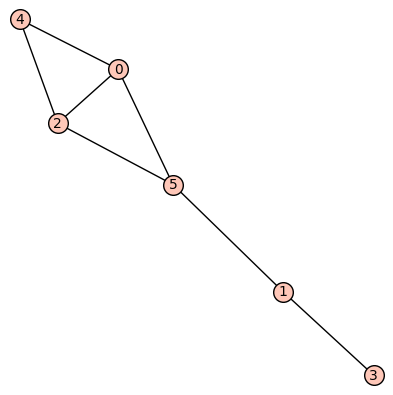

EQj_  6


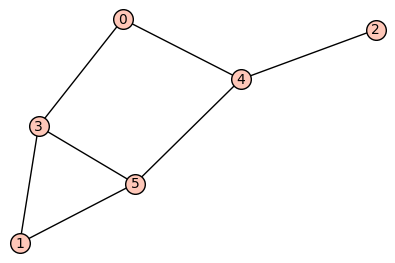

EEhW  6


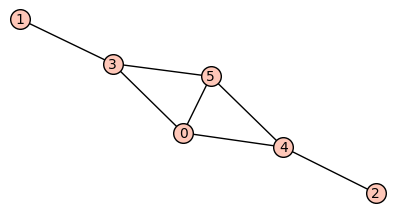

EEiW  6


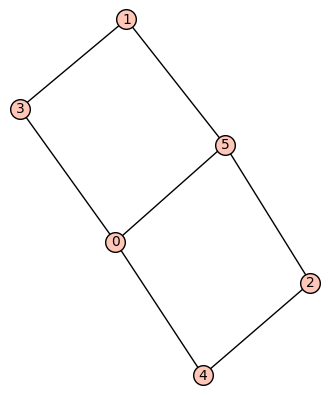

EEj_  6


In [14]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where the False occurs
indF = df.index[df.levelable == "F"]

# Randomly sample some 
ind = np.random.choice(indF, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at levelable graphs

We should expect that these do not have such paths.

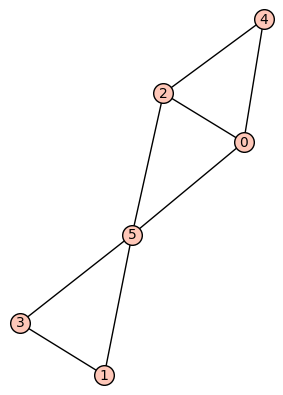

EQjo  6


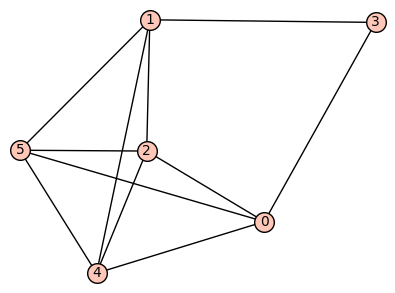

E]zg  6


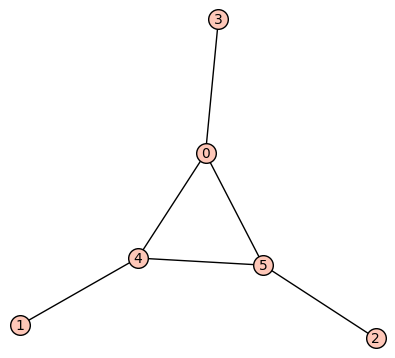

ECqg  5


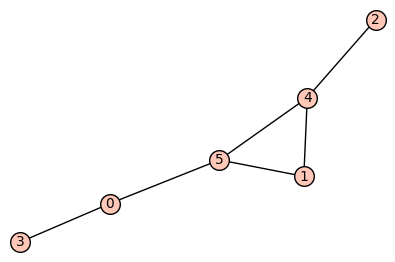

ECZG  6


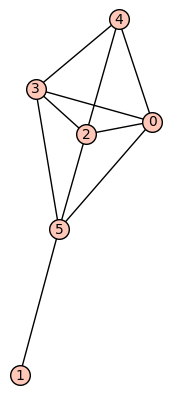

ETno  6


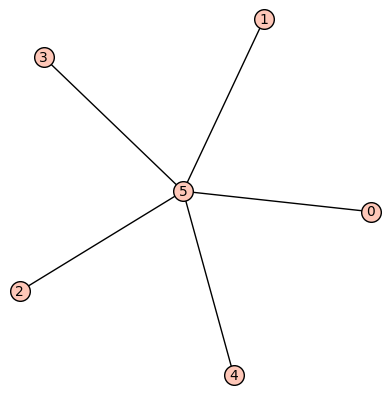

E?Bw  3


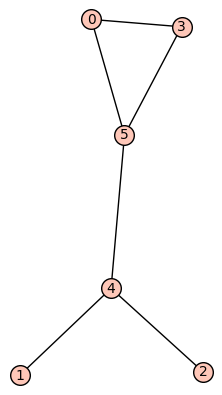

ECYW  5


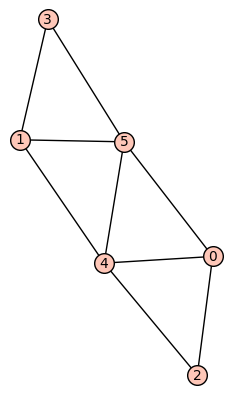

EQzW  6


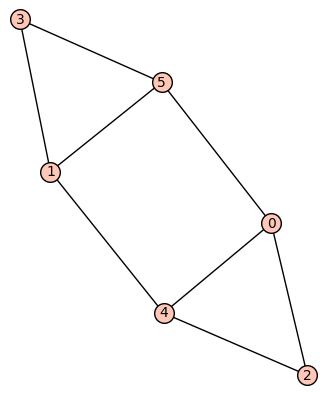

EQzO  6


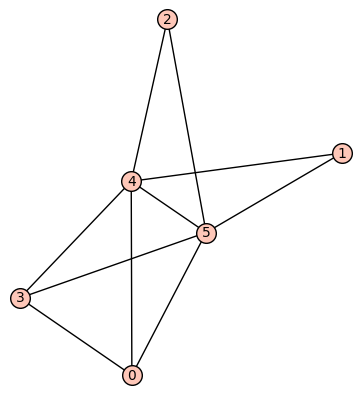

EC~w  6


In [16]:
df = pd.read_csv("results/resultsconnected6.csv")

# Get the index where levelable is true
indT = df.index[df.levelable == "T"]

# Randomly sample some 
ind = np.random.choice(indT, 10)

# Get a list of the graph6 strings that aren't levelable
g6sList = list(df.loc[ind]["graph6 string"])

# Print length of the longest path
for s in g6sList:
    g = Graph()
    from_graph6(g, s)
    g.show()
    
    print s + "  "+ str(g.longest_path().order())

### Look at graphs with only short paths

In [ ]:
shortPaths = pd.DataFrame(columns = ["graph6 string", "longest path", "levelable"] )

for g in graphs.nauty_geng(8):
    if g.longest_path().order() < 5:
        shortPaths = shortPaths.append({"graph6 string": g.graph6_string(),
                          "longest path": g.longest_path().order(),
                          "levelable": is_levelable(g)}, 
                         ignore_index = True)

In [107]:
shortPaths

,graph6 string,longest path,levelable
0,G?????,0,True
1,G???C?,2,True
2,G???E?,3,True
3,G???F?,3,True
4,G???F_,3,True
5,G???Fo,3,True
6,G???Fw,3,True
7,G???F{,3,True
8,G??CA?,2,True
9,G??CE?,4,True


In [23]:
# Are all graphs with short paths levelable?
sum(shortPaths['levelable']) == shortPaths.shape[0]

True

### Conjecture 1 (graphs without long paths are levelable)

Let $G$ be a graph on $n > 5$ vertices. If the longest path in $G$ is less than 5 vertices long, then $\textrm{ind}(G)$ is levelable.

## Regular graphs

It's definitely not true that levelable graphs are necessarily regular. 

As a counterexample, this graph (with graph6 string `G??FF{` is levelable but not regular:

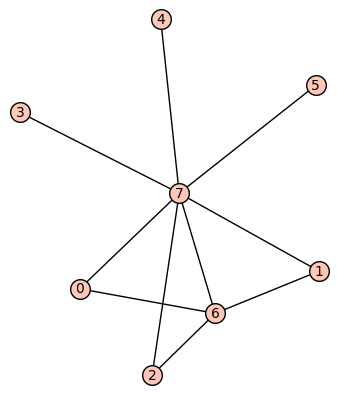

is levelable? True
is regular? False


In [63]:
g = Graph()
from_graph6(g, "G??FF{")

g.show()
print "is levelable? " + str(is_levelable(g))
print "is regular? " + str(g.is_regular())

### Are levelable graphs regular?

In [50]:
df = pd.read_csv("results/resultsconnected7.csv")

isRegular = pd.DataFrame(columns = ["graph6 string", "regular"])

for index, row in df.iterrows():
    g = Graph()
    from_graph6(g, row['graph6 string'])
    
    if g.is_regular():
        isRegular = isRegular.append({"graph6 string": row["graph6 string"], "regular":1}, ignore_index = True)
        
    elif not(g.is_regular()):
        isRegular = isRegular.append({"graph6 string": row["graph6 string"],"regular":0}, ignore_index = True)

In [57]:
df2 = df.merge(isRegular, on = "graph6 string")
df2[df2.regular == 1]

,graph6 string,levelable,minimized solution,regular
291,FCp`_,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
720,FFzvO,T,"[2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0]",1
816,FUzro,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1
852,F~~~w,T,"[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]",1


## Are trees levelable?

In [20]:
for i in range(5, 10):
    for t in TreeIterator(i):
        print is_levelable(t)

False
True
True
False
False
True
True
True
True
False
False
False
False
False
True
True
False
True
True
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
True
False
True
True
True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
True
False
True
False
True
True
False
True
True
True
True
False
True
True
True
True


## To do:
    check for duplicates in graph6 string 
    counter example to induced subgraph (minimum obstruction): ECZG we can find induced P(5), and it is levelable
    bug-fixing linear program (try maximizing) 
    complete generating 9 vertices
    start generating 10 vertices
    
  
    question: if diam(G) is small, does that mean levelable?
    question: trees up to 10 vertices levelable?
    
    
To Do: From October 27
* show that it is enough to show for connected compments of a graph
* If it contains a P(5) + another condition is it definitely not levelable? What is this other condition? because it seems like most graphs who 
* Borrow: "Monomial Ideals"
* Grobner bases in Commutative Algebra by Ene and Herzog